In [1]:
!git clone https://github.com/pawij/amml-2526

Cloning into 'amml-2526'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 16 (delta 1), reused 16 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (16/16), 4.82 MiB | 25.03 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [2]:
import sys
sys.path.insert(0,'/content/amml-2526/src')

In [3]:
import torch
from model import VariationalAutoencoder

use_gpu = True
device = torch.device("cuda:0" if use_gpu and torch.cuda.is_available() else "cpu")

model0 = VariationalAutoencoder()
model0.load_state_dict(torch.load('/content/amml-2526/data/amml_model0_weights.pth', weights_only=True))
model0 = model0.to(device)
model0.eval()

model1 = VariationalAutoencoder()
model1.load_state_dict(torch.load('/content/amml-2526/data/amml_model1_weights.pth', weights_only=True))
model1 = model1.to(device)
model1.eval()

VariationalAutoencoder(
  (conv1): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (fc_mu): Linear(in_features=6272, out_features=20, bias=True)
  (fc_logvar): Linear(in_features=6272, out_features=20, bias=True)
  (fc_decode): Linear(in_features=20, out_features=6272, bias=True)
  (conv2_decode): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (conv1_decode): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
)

In [4]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

batch_size = 256

img_transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = MNIST(root='./data/MNIST', download=True, train=True, transform=img_transform)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = MNIST(root='./data/MNIST', download=True, train=False, transform=img_transform)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 126MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 11.2MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 117MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.47MB/s]


Original image


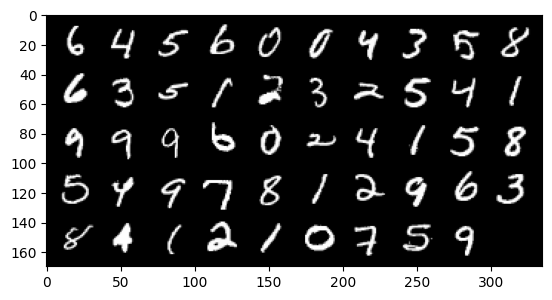

In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

import torchvision.utils

# This function takes as an input the images to reconstruct
# and the name of the model with which the reconstructions
# are performed
def to_img(x):
    x = x.clamp(0, 1)
    return x

# DataLoader does not support indexing, so access by iterating
for images, labels in test_dataloader:
  break

# First visualise the original images
def show_image(img):
    img = to_img(img)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

print('Original image')
show_image(torchvision.utils.make_grid(images[1:50],10,5))

# Reconstruct and visualise the images using the models